In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
ads_clients_data = pd.read_csv('ads_clients_data.csv')
ads_data = pd.read_csv('ads_data.csv')

In [3]:
ads_clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [4]:
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


# 2

In [13]:
new_data =ads_data.groupby(['ad_id', 'event'],as_index=False).count().pivot(index='ad_id',columns='event',values='ad_cost').fillna(0).reset_index()

In [15]:
new_data

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


In [18]:
new_data['click'].mean()

113.1378238341969

In [19]:
new_data['view'].mean()

923.1316062176165

# 3

In [20]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [30]:
new_data['logarifm'] = np.log(new_data['view'])

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
new_data

event,ad_id,click,view,logarifm
0,2,1.0,101.0,4.615121
1,3,3.0,184.0,5.214936
2,1902,1.0,41.0,3.713572
3,2064,0.0,35.0,3.555348
4,2132,1.0,58.0,4.060443
...,...,...,...,...
960,122004,4.0,100.0,4.605170
961,122013,0.0,156.0,5.049856
962,122023,0.0,68.0,4.219508
963,122031,1.0,138.0,4.927254


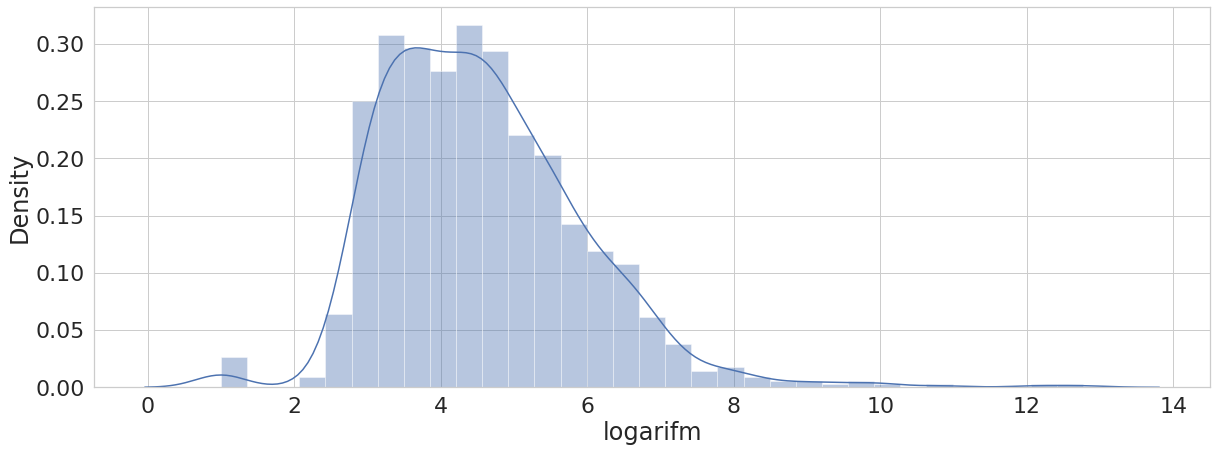

In [49]:
sns.distplot(new_data.logarifm)

In [48]:
np.isinf(new_data.logarifm).sum()

0

In [45]:
def infin(x):
    if np.isinf(x):
        return 1
    return x

In [47]:
new_data.logarifm = new_data.logarifm.apply(infin)

1
1
1
1
1
1
1
1
1


# 4

In [53]:
data_4 = ads_data.query('event == "view"')
data_4

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999993,2019-04-05,2019-04-05 20:59:52,view,ios,112583,111818,112260,CPM,210.1,0,22392
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [70]:
new_data_4 = data_4.groupby(['date','ad_id'],as_index=False).count()#.pivot(index='ad_id',columns='date',values='client_union_id').reset_index()

In [71]:
new_data_4 = new_data_4.fillna(0)
new_data_4

,date,ad_id,time,event,platform,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2,83,83,83,83,83,83,83,83,83
1,2019-04-01,3,158,158,158,158,158,158,158,158,158
2,2019-04-01,4922,1211,1211,1211,1211,1211,1211,1211,1211,1211
3,2019-04-01,4933,642,642,642,642,642,642,642,642,642
4,2019-04-01,9418,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...
1926,2019-04-06,119161,14,14,14,14,14,14,14,14,14
1927,2019-04-06,119175,27,27,27,27,27,27,27,27,27
1928,2019-04-06,121309,111,111,111,111,111,111,111,111,111
1929,2019-04-06,121820,11,11,11,11,11,11,11,11,11


In [76]:
new_data_4 = new_data_4.groupby('date').mean()
new_data_4

,ad_id,time,event,platform,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
date,,,,,,,,,,
2019-04-01,59137.900709,154.482270,154.482270,154.482270,154.482270,154.482270,154.482270,154.482270,154.482270,154.482270
2019-04-02,58430.781065,137.786982,137.786982,137.786982,137.786982,137.786982,137.786982,137.786982,137.786982,137.786982
2019-04-03,61182.561111,163.952778,163.952778,163.952778,163.952778,163.952778,163.952778,163.952778,163.952778,163.952778
2019-04-04,59279.457002,675.901720,675.901720,675.901720,675.901720,675.901720,675.901720,675.901720,675.901720,675.901720
2019-04-05,54708.533333,919.109677,919.109677,919.109677,919.109677,919.109677,919.109677,919.109677,919.109677,919.109677
2019-04-06,54639.813636,277.122727,277.122727,277.122727,277.122727,277.122727,277.122727,277.122727,277.122727,277.122727


In [86]:
new_data_4['event'] = new_data_4.time.rolling(2).mean()
new_data_4 = new_data_4.reset_index()
new_data_4

,index,date,ad_id,time,event,platform,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,0,2019-04-01,59137.900709,154.482270,NaN,154.482270,154.482270,154.482270,154.482270,154.482270,154.482270,154.482270
1,1,2019-04-02,58430.781065,137.786982,146.134626,137.786982,137.786982,137.786982,137.786982,137.786982,137.786982,137.786982
2,2,2019-04-03,61182.561111,163.952778,150.869880,163.952778,163.952778,163.952778,163.952778,163.952778,163.952778,163.952778
3,3,2019-04-04,59279.457002,675.901720,419.927249,675.901720,675.901720,675.901720,675.901720,675.901720,675.901720,675.901720
4,4,2019-04-05,54708.533333,919.109677,797.505699,919.109677,919.109677,919.109677,919.109677,919.109677,919.109677,919.109677
5,5,2019-04-06,54639.813636,277.122727,598.116202,277.122727,277.122727,277.122727,277.122727,277.122727,277.122727,277.122727


# 5

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


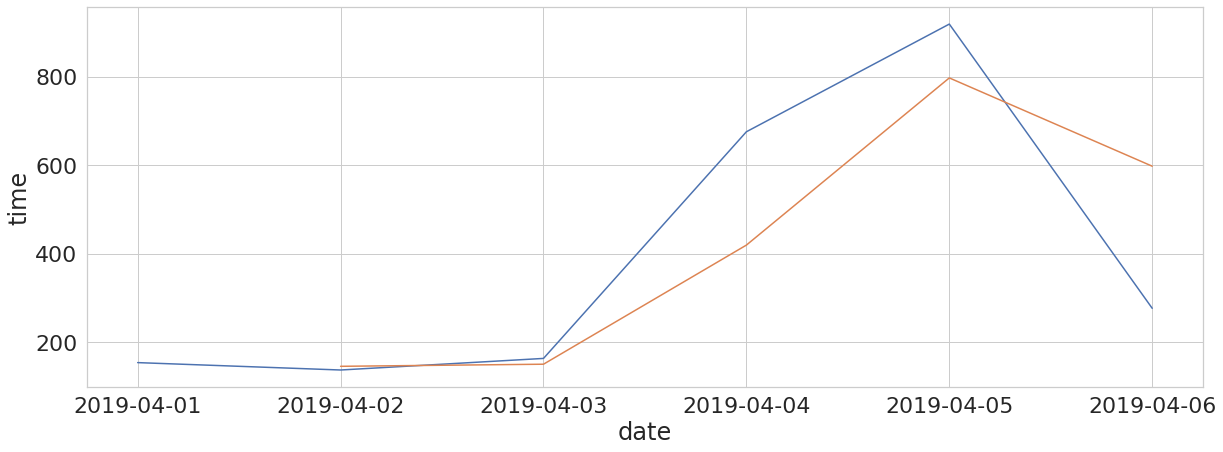

In [87]:
sns.lineplot(new_data_4.date, new_data_4.time)
sns.lineplot(new_data_4.date, new_data_4.event)

# 6

In [8]:
data = ads_clients_data.merge(ads_data, on='client_union_id')

In [9]:
data

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 21:54:35,view,android,122078,122078,CPC,56.4,0,32354
999996,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:26:58,view,web,122078,122078,CPC,56.4,0,32354
999997,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:32:34,view,android,122078,122078,CPC,56.4,0,32354
999998,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:43:03,view,ios,122078,122078,CPC,56.4,0,32354


In [10]:
data['date_x'] = pd.to_datetime(data['date_x'])
data['date_y'] = pd.to_datetime(data['date_y'])
data['time'] = pd.to_datetime(data['time'])
data['create_date'] = pd.to_datetime(data['create_date'])

In [11]:
data.dtypes

date_x                   datetime64[ns]
client_union_id                   int64
community_id                      int64
create_date              datetime64[ns]
date_y                   datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [12]:
data['data_dif'] = data['date_y'] - data['create_date']

In [18]:
data.groupby('client_union_id').agg({'data_dif':'min'}).mean()

data_dif   124 days 09:04:43.532219570
dtype: timedelta64[ns]

# 7

In [118]:
data.query('"0d" < data_dif < "365d"')

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,data_dif
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98 days 00:08:51
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98 days 00:09:36
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035,98 days 00:29:30
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035,98 days 00:29:58
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035,98 days 00:51:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 21:54:35,view,android,122078,122078,CPC,56.4,0,32354,71 days 21:54:35
999996,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:26:58,view,web,122078,122078,CPC,56.4,0,32354,71 days 22:26:58
999997,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:32:34,view,android,122078,122078,CPC,56.4,0,32354,71 days 22:32:34
999998,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:43:03,view,ios,122078,122078,CPC,56.4,0,32354,71 days 22:43:03


In [117]:
data.data_dif = data.data_dif.fillna('366d')

In [123]:
data_7 = data.groupby('client_union_id').agg({'data_dif':'min'})
data_7

,data_dif
client_union_id,
1,98 days 00:08:51
9,114 days 00:48:39
13,66 days 00:52:05
16,105 days 02:01:56
20,32 days 00:06:06
...,...
122004,67 days 00:12:11
122013,151 days 00:04:14
122023,126 days 00:18:24


In [130]:
ads_clients_data.client_union_id.nunique()

122078

In [129]:
838/122078*100

0.6864463703533806

# 8

In [154]:
data_8 = data.groupby('client_union_id',as_index=False).agg({'data_dif':'min'})

In [155]:
data_8

,client_union_id,data_dif
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [156]:
data_8['days'] = pd.cut(data_8.data_dif, pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']))

In [157]:
data_8.groupby('days').count()

,client_union_id,data_dif
days,,
"(0 days 00:00:00, 30 days 00:00:00]",11,11
"(30 days 00:00:00, 90 days 00:00:00]",263,263
"(90 days 00:00:00, 180 days 00:00:00]",396,396
"(180 days 00:00:00, 365 days 00:00:00]",168,168


In [141]:
data_8['days'].value_counts()

(90 days 00:00:00, 180 days 00:00:00]     397
(30 days 00:00:00, 90 days 00:00:00]      262
(180 days 00:00:00, 365 days 00:00:00]    169
(0 days 00:00:00, 30 days 00:00:00]        10
Name: days, dtype: int64

# 9

In [158]:
data_9 = data.groupby('client_union_id',as_index=False).agg({'data_dif':'min'})

In [159]:
data_9['days'] = pd.cut(data_9.data_dif, pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']), labels=['<30','<90','<180','<365'])

In [160]:
data_9

,client_union_id,data_dif,days
0,1,98 days,<180
1,9,114 days,<180
2,13,66 days,<90
3,16,105 days,<180
4,20,32 days,<90
...,...,...,...
833,122004,67 days,<90
834,122013,151 days,<180
835,122023,126 days,<180
836,122031,96 days,<180


In [161]:
px.bar(x=data_9.days, y=data_9.client_union_id)